In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



/Users/benmagevney/miniconda/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [35]:
# plot 3x3 grid of new confirmed cases
def plot_val_test_split(datasets, prefix, split=0.2):
    fig, axes = plt.subplots(3, 3, figsize=(30, 15)) 
    axes = axes.flatten()
    for i, df in enumerate(datasets):
        region = df.iloc[0]['region']

        train_df, temp_test_df = train_test_split(df, test_size=split, shuffle=False)
        val_df, test_df  = train_test_split(temp_test_df, test_size=0.5, shuffle=False)

        train = train_df['new_confirmed']
        test = test_df['new_confirmed']
        val = val_df['new_confirmed']


        ax = axes[i]
        y = df['new_confirmed']
        ax.plot(y, label="train",)
        ax.plot(test, label="test", color="#ff7f0e")
        ax.plot(val, label="val", color="purple")
        ax.set_title(f"{prefix} {region} Train-Val-Test Splits")
        ax.set_xlabel('Date')
        ax.set_ylabel('new_confirmed')
        ax.tick_params(rotation=45)
        ax.legend()
        gap = 120
        # ax.set_xticks(range(0, len(y.index), gap))
        # ax.set_xticklabels(y.index[::gap])

    plt.tight_layout()
    plt.show()
    

East North Central
(929, 6)
East South Central
(929, 7)
Mid-Atlantic
(929, 7)
Mountain
(929, 6)
New England
(929, 5)
Pacific
(929, 7)
South Atlantic
(929, 6)
West North Central
(929, 6)
West South Central
(929, 5)


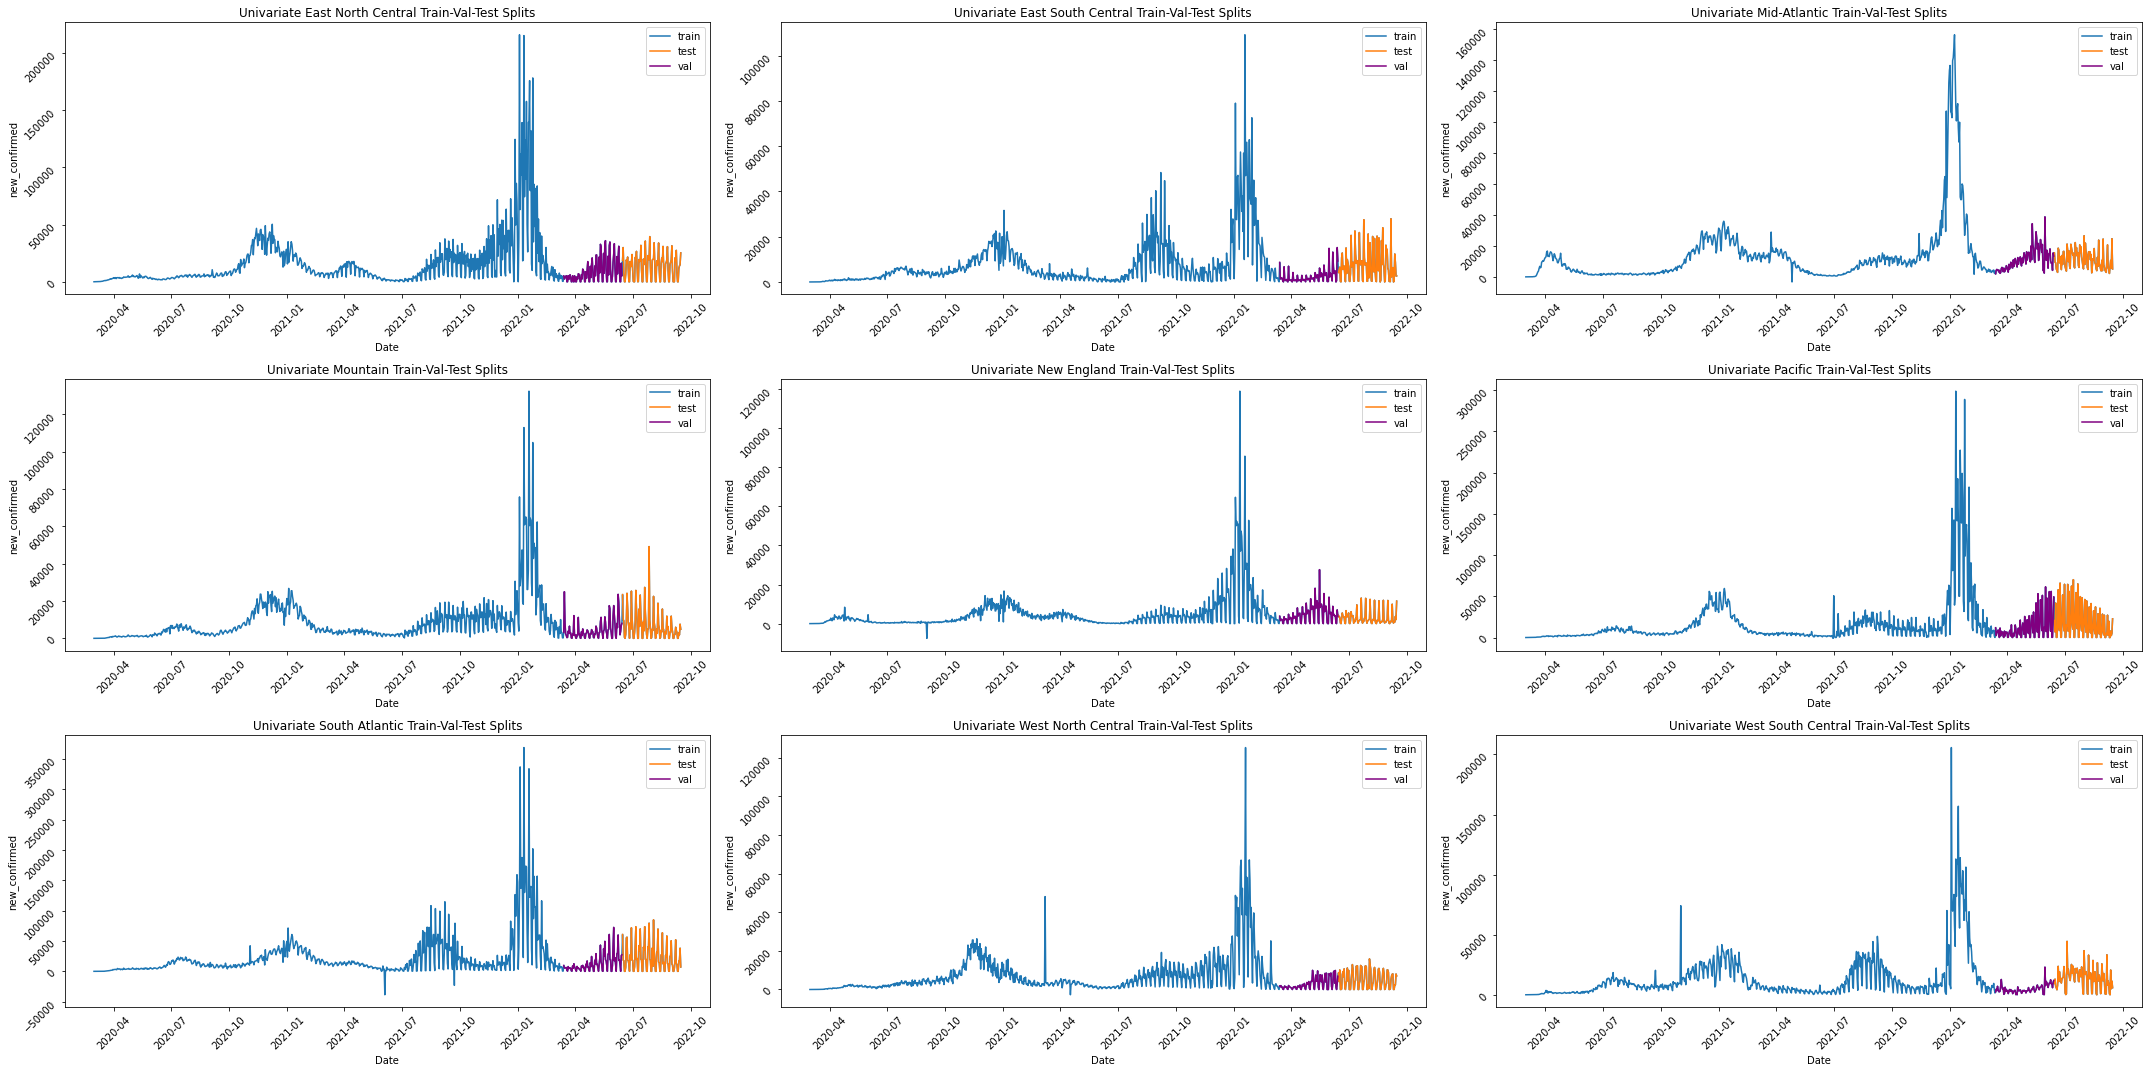

In [36]:
# read datasets 
enc = pd.read_csv('../../data/regional_datasets/univariate/enc_data_univ.csv')
esc = pd.read_csv('../../data/regional_datasets/univariate/esc_data_univ.csv')
mid_atlantic = pd.read_csv('../../data/regional_datasets/univariate/mid_atlantic_data_univ.csv')
mountain = pd.read_csv('../../data/regional_datasets/univariate/mountain_data_univ.csv')
new_england = pd.read_csv('../../data/regional_datasets/univariate/new_england_data_univ.csv')
pacific = pd.read_csv('../../data/regional_datasets/univariate/pacific_data_univ.csv')
south_atlantic = pd.read_csv('../../data/regional_datasets/univariate/south_atlantic_data_univ.csv')
wnc = pd.read_csv('../../data/regional_datasets/univariate/wnc_data_univ.csv')
wsc = pd.read_csv('../../data/regional_datasets/univariate/wsc_data_univ.csv')

# ignore values before march 
enc = enc[enc.date >= "2020-03-01"]
esc = esc[esc.date >= "2020-03-01"]
mid_atlantic = mid_atlantic[mid_atlantic.date >= "2020-03-01"]
mountain = mountain[mountain.date >= "2020-03-01"]
new_england = new_england[new_england.date >= "2020-03-01"]
pacific = pacific[pacific.date >= "2020-03-01"]
south_atlantic = south_atlantic[south_atlantic.date >= "2020-03-01"]
wnc = wnc[wnc.date >= "2020-03-01"]
wsc = wsc[wsc.date >= "2020-03-01"]

uni_datasets = [enc, esc, mid_atlantic, mountain, new_england, pacific, south_atlantic, wnc, wsc]
for df in uni_datasets:
    df.set_index(pd.to_datetime(df['date']), inplace=True)
    df.drop(columns=["Unnamed: 0", "date"], axis=1, inplace=True)
    df.sort_index(inplace=True)
    df = df[df.index >= "2020-03-01"]
    print(df.iloc[0]["region"])
    print(df.shape)
    
plot_val_test_split(uni_datasets, "Univariate")


East North Central
863 52
East South Central
857 53
Mid-Atlantic
846 53
Mountain
853 52
New England
850 51
Pacific
862 53
South Atlantic
845 52
West North Central
828 52
West South Central
850 51


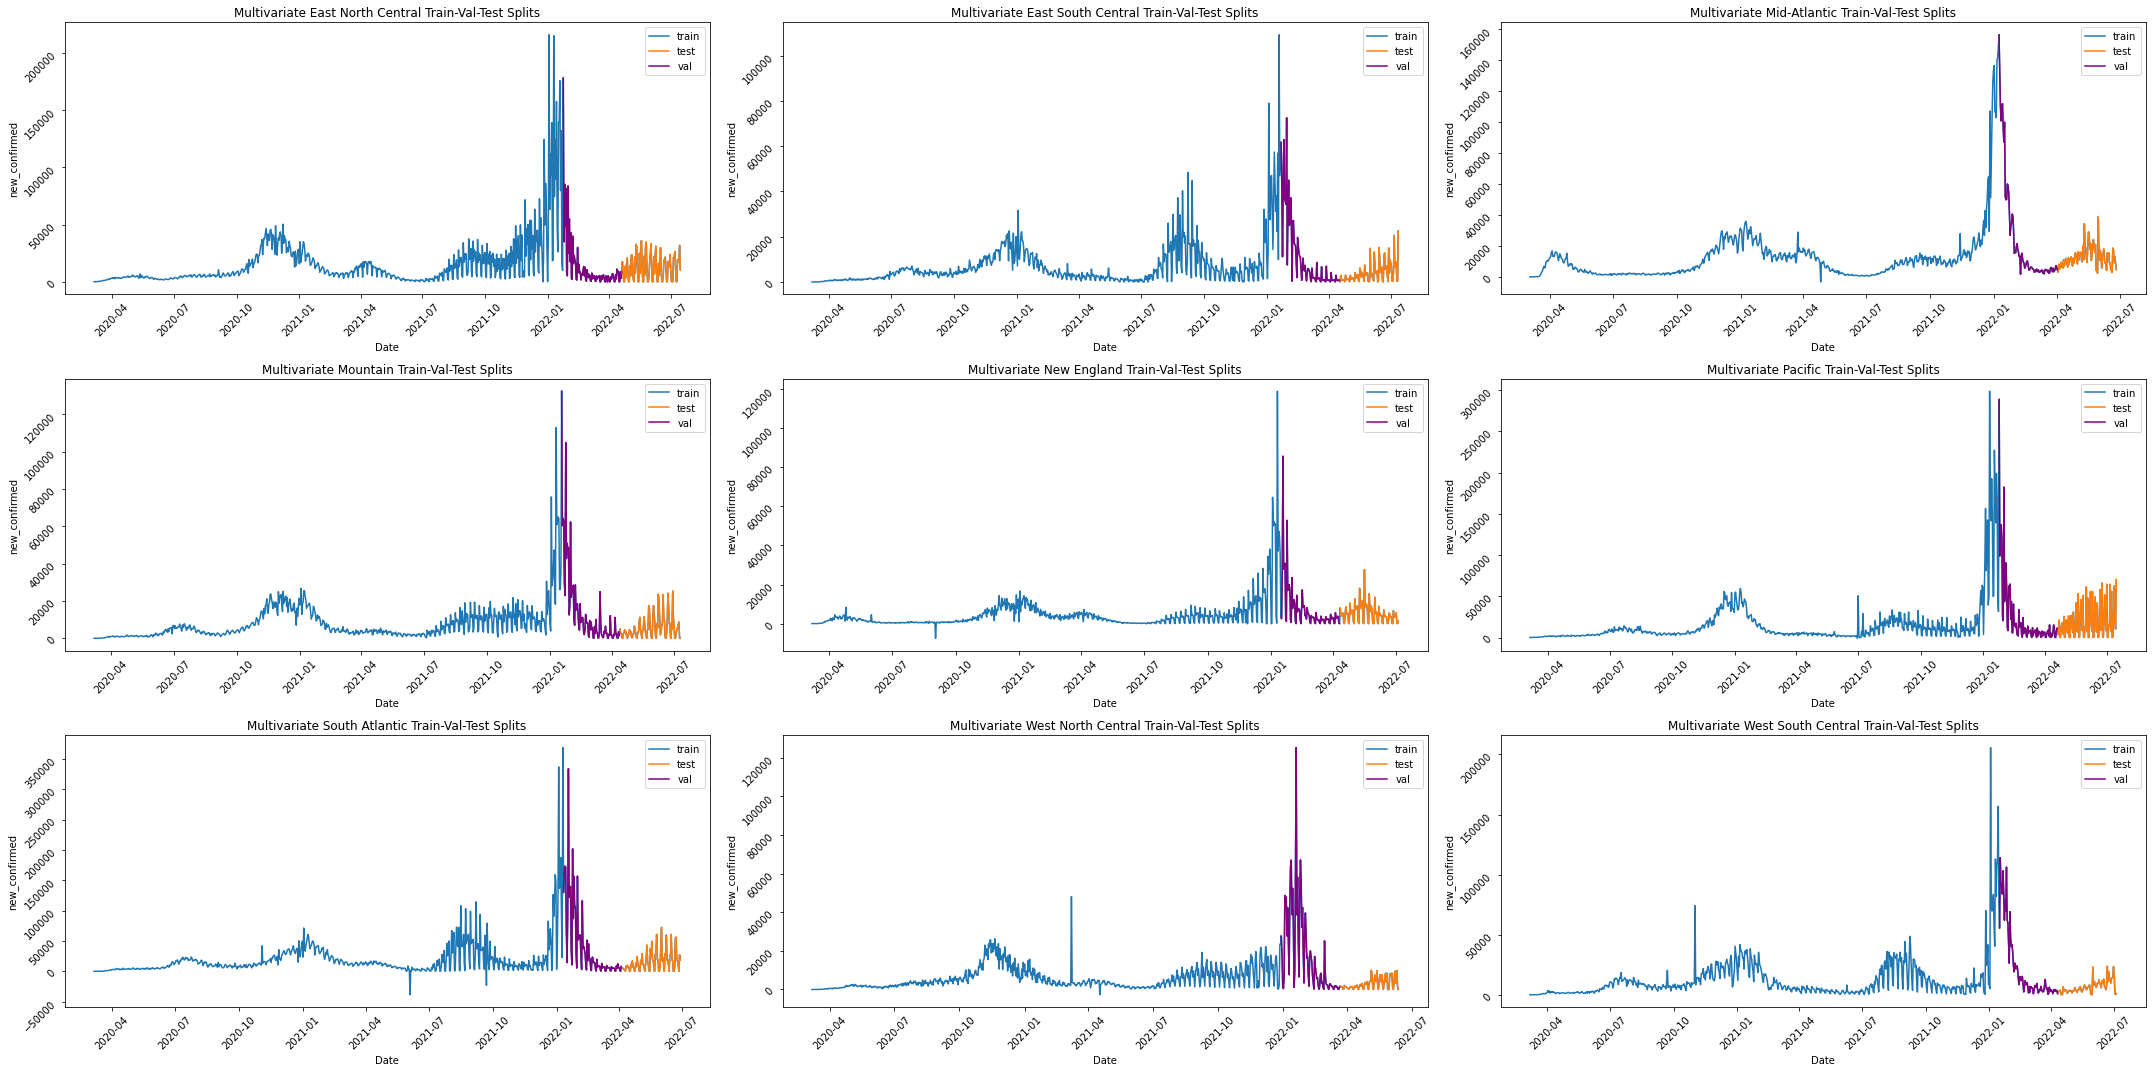

In [37]:
# read datasets 
enc = pd.read_csv('../../data/regional_datasets/multivariate/enc_data_multi.csv')
esc = pd.read_csv('../../data/regional_datasets/multivariate/esc_data_multi.csv')
mid_atlantic = pd.read_csv('../../data/regional_datasets/multivariate/mid_atlantic_data_multi.csv')
mountain = pd.read_csv('../../data/regional_datasets/multivariate/mountain_data_multi.csv')
new_england = pd.read_csv('../../data/regional_datasets/multivariate/new_england_data_multi.csv')
pacific = pd.read_csv('../../data/regional_datasets/multivariate/pacific_data_multi.csv')
south_atlantic = pd.read_csv('../../data/regional_datasets/multivariate/south_atlantic_data_multi.csv')
wnc = pd.read_csv('../../data/regional_datasets/multivariate/wnc_data_multi.csv')
wsc = pd.read_csv('../../data/regional_datasets/multivariate/wsc_data_multi.csv')
multi_datasets = [enc, esc, mid_atlantic, mountain, new_england, pacific, south_atlantic, wnc, wsc]
for df in multi_datasets:
    df.set_index(pd.to_datetime(df['date']), inplace=True)
    df.drop(columns=["Unnamed: 0", "date"], axis=1, inplace=True)
    df.sort_index(inplace=True)
    print(df.iloc[0]["region"])
    print(df.shape[0], df.shape[1]-1)

plot_val_test_split(multi_datasets, "Multivariate", split=0.20)

East North Central
863 52
East South Central
857 53
Mid-Atlantic
846 53
Mountain
853 52
New England
850 51
Pacific
862 53
South Atlantic
845 52
West North Central
828 52
West South Central
850 51


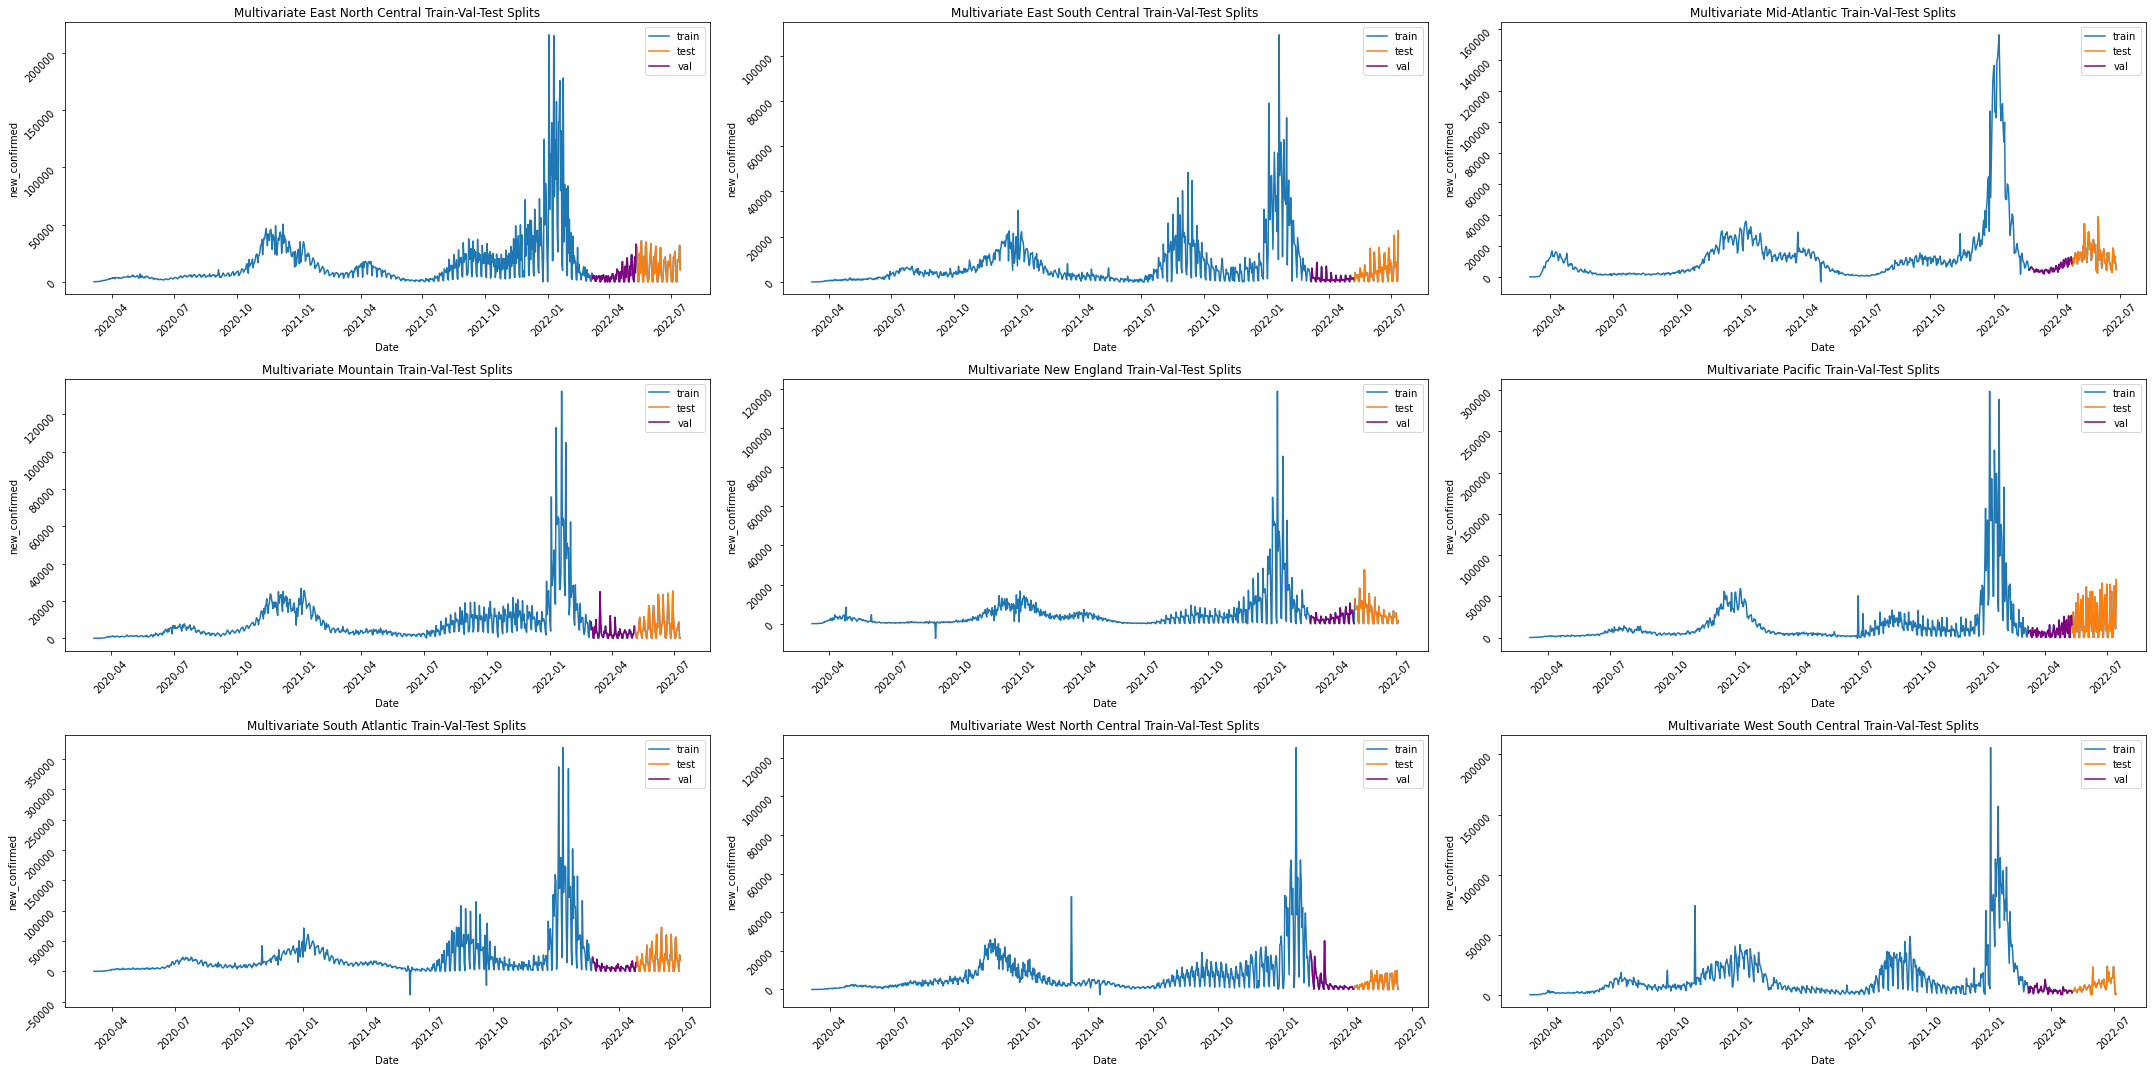

In [38]:
# read datasets 
enc = pd.read_csv('../../data/regional_datasets/multivariate/enc_data_multi.csv')
esc = pd.read_csv('../../data/regional_datasets/multivariate/esc_data_multi.csv')
mid_atlantic = pd.read_csv('../../data/regional_datasets/multivariate/mid_atlantic_data_multi.csv')
mountain = pd.read_csv('../../data/regional_datasets/multivariate/mountain_data_multi.csv')
new_england = pd.read_csv('../../data/regional_datasets/multivariate/new_england_data_multi.csv')
pacific = pd.read_csv('../../data/regional_datasets/multivariate/pacific_data_multi.csv')
south_atlantic = pd.read_csv('../../data/regional_datasets/multivariate/south_atlantic_data_multi.csv')
wnc = pd.read_csv('../../data/regional_datasets/multivariate/wnc_data_multi.csv')
wsc = pd.read_csv('../../data/regional_datasets/multivariate/wsc_data_multi.csv')
multi_datasets = [enc, esc, mid_atlantic, mountain, new_england, pacific, south_atlantic, wnc, wsc]
for df in multi_datasets:
    df.set_index(pd.to_datetime(df['date']), inplace=True)
    df.drop(columns=["Unnamed: 0", "date"], axis=1, inplace=True)
    df.sort_index(inplace=True)
    print(df.iloc[0]["region"])
    print(df.shape[0], df.shape[1]-1)

plot_val_test_split(multi_datasets, "Multivariate", split=0.15)

In [10]:
# read datasets 
import numpy as np
enc = pd.read_csv('../../data/regional_datasets/xgboost/enc_data_multi.csv')
esc = pd.read_csv('../../data/regional_datasets/xgboost/esc_data_multi.csv')
mid_atlantic = pd.read_csv('../../data/regional_datasets/xgboost/mid_atlantic_data_multi.csv')
mountain = pd.read_csv('../../data/regional_datasets/xgboost/mountain_data_multi.csv')
new_england = pd.read_csv('../../data/regional_datasets/xgboost/new_england_data_multi.csv')
pacific = pd.read_csv('../../data/regional_datasets/xgboost/pacific_data_multi.csv')
south_atlantic = pd.read_csv('../../data/regional_datasets/xgboost/south_atlantic_data_multi.csv')
wnc = pd.read_csv('../../data/regional_datasets/xgboost/wnc_data_multi.csv')
wsc = pd.read_csv('../../data/regional_datasets/xgboost/wsc_data_multi.csv')
datasets = [enc, esc, mid_atlantic, mountain, new_england, pacific, south_atlantic, wnc, wsc]
for df in datasets:
    df.drop(['Unnamed: 0', 'Unnamed: 1'], axis=1, inplace=True)
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.isocalendar().week.astype(np.int64)

    print(df.iloc[0]["region"])
    print(df.shape[0], df.shape[1] - 5)


East North Central
4355 62
East South Central
3461 62
Mid-Atlantic
2586 61
Mountain
6908 65
New England
5237 62
Pacific
4387 63
South Atlantic
7848 66
West North Central
6018 64
West South Central
3462 60
